In [4]:
#setwd('6to Semestre')
#setwd('Temas Selectos de Matemáticas')
#setwd('Covid')
suppressMessages(library(dplyr))
suppressMessages(library(verification))


cv=read.csv("covid.csv",header=T)
cv <- na.omit(cv)
cv=cv%>%tbl_df()
cv=cv%>%filter(as.numeric(RESULTADO)<=2)

p = cv %>% filter(RESULTADO == 2) %>% summarize(p=n())  
num_negativo = p[[1]] #total de casos negativos
p = cv %>% filter(RESULTADO == 1) %>% summarize(p=n())
num_positivos = p[[1]] #numero de casos positivos

cv_covid_negativo = cv %>% filter(RESULTADO == 2)
cv_covid_positivo = cv %>% filter(RESULTADO == 1)
h = sample(1:num_negativo,num_positivos,replace = FALSE) #generamos numeros aleatorios
cv_int = cv_covid_negativo %>% slice(h)
cv <- bind_rows(cv_int,cv_covid_positivo)


In [5]:
str(cv)
cv$ORIGEN <- as.factor(cv$ORIGEN)
cv$SECTOR <- as.factor(cv$SECTOR)
cv$ENTIDAD_UM<- as.factor(cv$ENTIDAD_UM)
cv$SEXO <- as.factor(cv$SEXO)
cv$ENTIDAD_NAC <- as.factor(cv$ENTIDAD_NAC)
cv$ENTIDAD_RES <- as.factor(cv$ENTIDAD_RES)
cv$MUNICIPIO_RES <- as.factor(cv$MUNICIPIO_RES)
cv$TIPO_PACIENTE <- as.factor(cv$TIPO_PACIENTE)
cv$INTUBADO <- as.factor(cv$INTUBADO )
cv$NEUMONIA  <- as.factor(cv$NEUMONIA )
cv$NACIONALIDAD <- as.factor(cv$NACIONALIDAD)
cv$EMBARAZO <- as.factor(cv$EMBARAZO)
cv$HABLA_LENGUA_INDI <- as.factor(cv$HABLA_LENGUA_INDIG)
cv$DIABETES <- as.factor(cv$DIABETES)
cv$EPOC <- as.factor(cv$EPOC)
cv$ASMA <- as.factor(cv$ASMA)
cv$INMUSUPR  <- as.factor(cv$INMUSUPR  )
cv$HIPERTENSION   <- as.factor(cv$HIPERTENSION  )
cv$OTRA_CON <- as.factor(cv$OTRA_COM)
cv$CARDIOVASCULAR <- as.factor(cv$CARDIOVASCULAR)
cv$OBESIDAD  <- as.factor(cv$OBESIDAD )
cv$RENAL_CRONICA  <- as.factor(cv$RENAL_CRONICA )
cv$TABAQUISMO <- as.factor(cv$TABAQUISMO)
cv$OTRO_CASO  <- as.factor(cv$OTRO_CASO  )
cv$RESULTADO    <- as.factor(cv$RESULTADO  )
cv$MIGRANTE <- as.factor(cv$MIGRANTE)
cv$UCI <- as.factor(cv$UCI)
cv$FECHA_ACTUALIZACION <- as.Date(cv$FECHA_ACTUALIZACION )
cv$FECHA_INGRESO <- as.Date(cv$FECHA_INGRESO)
cv$FECHA_SINTOMAS <- as.Date(cv$FECHA_SINTOMAS)
cv$FECHA_ACTUALIZACION <- as.Date(cv$FECHA_ACTUALIZACION)
attach(cv)
str(cv)
summary(cv$RESULTADO)
index <- sample(1:dim(cv), (dim(cv)/2), replace = F)
Train <- cv[index,]
Test <- cv[-index,]


Classes 'tbl_df', 'tbl' and 'data.frame':	125054 obs. of  35 variables:
 $ FECHA_ACTUALIZACION: Factor w/ 1 level "2020-05-22": 1 1 1 1 1 1 1 1 1 1 ...
 $ ID_REGISTRO        : Factor w/ 210070 levels "000013","000023",..: 115524 148361 103775 114685 170696 738 112582 30798 46761 64302 ...
 $ ORIGEN             : int  2 1 2 1 2 2 1 2 2 2 ...
 $ SECTOR             : int  9 12 12 12 4 12 99 12 12 4 ...
 $ ENTIDAD_UM         : int  9 15 9 14 9 31 32 28 1 31 ...
 $ SEXO               : int  1 1 1 2 2 1 1 2 1 1 ...
 $ ENTIDAD_NAC        : int  15 15 15 14 15 31 32 28 14 30 ...
 $ ENTIDAD_RES        : int  9 15 15 14 9 31 32 28 1 31 ...
 $ MUNICIPIO_RES      : int  5 5 58 85 7 102 48 22 1 50 ...
 $ TIPO_PACIENTE      : int  1 1 2 1 1 1 2 1 1 1 ...
 $ FECHA_INGRESO      : Factor w/ 143 levels "2020-01-01","2020-01-02",..: 136 132 131 113 133 140 127 108 128 125 ...
 $ FECHA_SINTOMAS     : Factor w/ 143 levels "2020-01-01","2020-01-02",..: 136 126 129 109 133 140 126 101 127 121 ...
 $ FECHA_DE

The following objects are masked from cv (pos = 3):

    ASMA, CARDIOVASCULAR, DIABETES, EDAD, EMBARAZO, ENTIDAD_NAC,
    ENTIDAD_RES, ENTIDAD_UM, EPOC, FECHA_ACTUALIZACION, FECHA_DEF,
    FECHA_INGRESO, FECHA_SINTOMAS, HABLA_LENGUA_INDI,
    HABLA_LENGUA_INDIG, HIPERTENSION, ID_REGISTRO, INMUSUPR, INTUBADO,
    MIGRANTE, MUNICIPIO_RES, NACIONALIDAD, NEUMONIA, OBESIDAD, ORIGEN,
    OTRA_COM, OTRA_CON, OTRO_CASO, PAIS_NACIONALIDAD, PAIS_ORIGEN,
    RENAL_CRONICA, RESULTADO, SECTOR, SEXO, TABAQUISMO, TIPO_PACIENTE,
    UCI




Classes 'tbl_df', 'tbl' and 'data.frame':	125054 obs. of  37 variables:
 $ FECHA_ACTUALIZACION: Date, format: "2020-05-22" "2020-05-22" ...
 $ ID_REGISTRO        : Factor w/ 210070 levels "000013","000023",..: 115524 148361 103775 114685 170696 738 112582 30798 46761 64302 ...
 $ ORIGEN             : Factor w/ 2 levels "1","2": 2 1 2 1 2 2 1 2 2 2 ...
 $ SECTOR             : Factor w/ 13 levels "1","2","3","4",..: 8 11 11 11 4 11 13 11 11 4 ...
 $ ENTIDAD_UM         : Factor w/ 32 levels "1","2","3","4",..: 9 15 9 14 9 31 32 28 1 31 ...
 $ SEXO               : Factor w/ 2 levels "1","2": 1 1 1 2 2 1 1 2 1 1 ...
 $ ENTIDAD_NAC        : Factor w/ 33 levels "1","2","3","4",..: 15 15 15 14 15 31 32 28 14 30 ...
 $ ENTIDAD_RES        : Factor w/ 32 levels "1","2","3","4",..: 9 15 15 14 9 31 32 28 1 31 ...
 $ MUNICIPIO_RES      : Factor w/ 309 levels "1","2","3","4",..: 5 5 58 85 7 102 48 22 1 50 ...
 $ TIPO_PACIENTE      : Factor w/ 2 levels "1","2": 1 1 2 1 1 1 2 1 1 1 ...
 $ FECHA_INGRESO

1     2 
62527 62527

Warning message in 1:dim(cv):
"numerical expression has 2 elements: only the first used"



Call:
glm(formula = RESULTADO ~ EDAD + ENTIDAD_RES + SEXO + NEUMONIA + 
    DIABETES + ASMA + EPOC + OTRO_CASO + OBESIDAD + HIPERTENSION + 
    CARDIOVASCULAR + INTUBADO, family = binomial, data = Train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3901  -1.0153  -0.3899   1.0752   2.4115  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       1.6986699  0.1362254  12.470  < 2e-16 ***
EDAD             -0.0149915  0.0006175 -24.278  < 2e-16 ***
ENTIDAD_RES2     -1.7422839  0.0807552 -21.575  < 2e-16 ***
ENTIDAD_RES3     -0.6391918  0.1094077  -5.842 5.15e-09 ***
ENTIDAD_RES4     -0.9096971  0.1291632  -7.043 1.88e-12 ***
ENTIDAD_RES5      0.3331143  0.0884795   3.765 0.000167 ***
ENTIDAD_RES6     -0.4055776  0.1921394  -2.111 0.034785 *  
ENTIDAD_RES7     -1.3255913  0.1003031 -13.216  < 2e-16 ***
ENTIDAD_RES8     -0.9846204  0.0953341 -10.328  < 2e-16 ***
ENTIDAD_RES9     -1.1662151  0.0685040 -17.024  < 2e-16 ***
ENTIDA

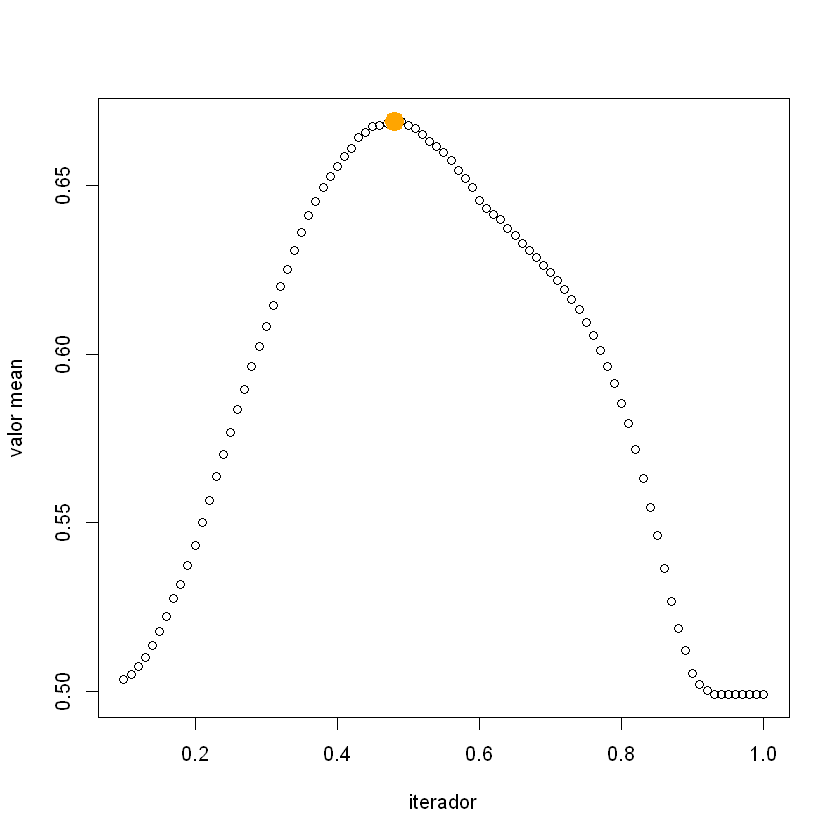

In [6]:
########################### LOGISTICA
##########################
glm1<- glm(RESULTADO~ EDAD+ENTIDAD_RES+SEXO+NEUMONIA+DIABETES+ASMA+EPOC+OTRO_CASO+OBESIDAD+HIPERTENSION+CARDIOVASCULAR+INTUBADO,family=binomial ,data = Train)
summary(glm1)
yhat2<- predict(glm1, newdata=Test,type="response")
#para elegir la mejor y evaluamos los posibles valores, desde 0.1 hasta 1 y vemos cual es el mean menor 
#se repite 91 veces 
size=1
val_mean <- rep(0,91)
for(i in seq(0.1,1,by=0.01)){
  y=as.integer(yhat2>i)
  y=ifelse(y =="0",1,2)
  val_mean[size]=mean(y == Test$RESULTADO)
  size=size+1
}
size=2
lugar=1
mejor=val_mean[lugar]
for(i in seq(0.11,1,by=0.01)){
  if(val_mean[size]>mejor){
    mejor=val_mean[size]
    b=i
    lugar=size
  }
  size=size+1
}
y=seq(0.1,1,by=0.01)
plot(y,val_mean,xlab = "iterador", ylab = "valor mean")
points(b, val_mean[lugar],  col = "orange", lwd = 10)


[1] 0.48

[1] 0.6691349

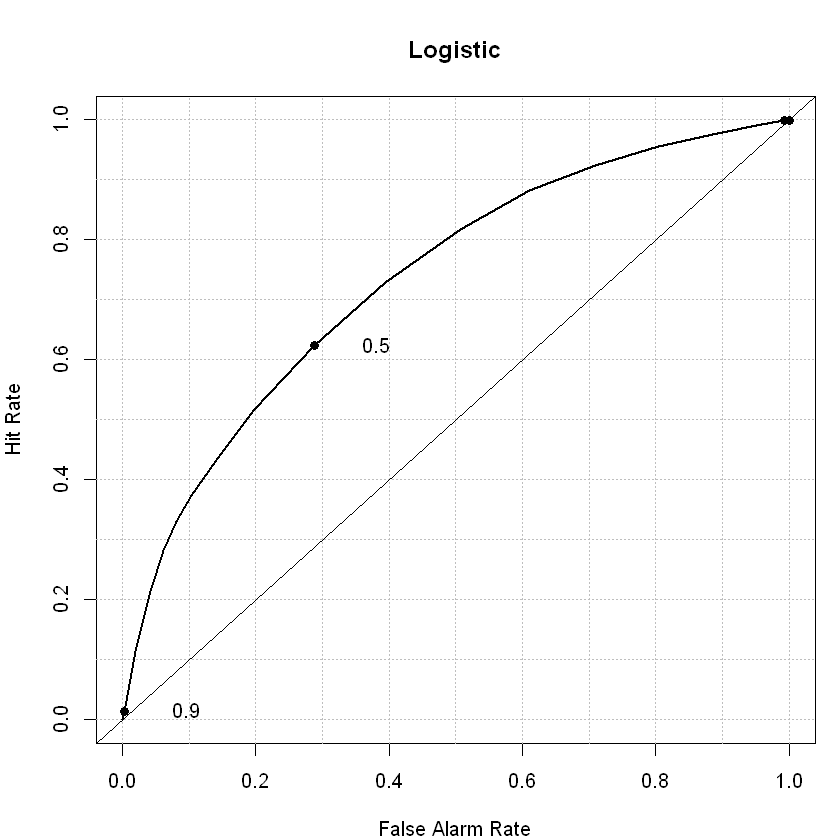

In [7]:
b
val_mean[lugar]
####rocplot

roc= ifelse(Test$RESULTADO==1,0,1)
roc.plot(x = roc, pred =yhat2,
         threshold = seq(0, max(yhat2), 0.05),
         plot.thres = c(0.03, 0.05, 0.1, 0.5, 0.9), main="Logistic")


